In [3]:
#Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
#Load the data
df=pd.read_csv('salesdaily.csv')
df=df.set_index('datum')
df.index=pd.to_datetime(df.index)

In [5]:
df.shape

(2106, 12)

In [6]:
df1=df[['N05B', 'N05C']]
columns=df1.columns

## N05B

In [7]:
# evaluate series stationarity - unit root test

test1_adf = adfuller(df1['N05B'], regression='c')
test1_kpss = kpss(df1['N05B'], regression='c')
print("ADF p-value = {} | KPSS p-value = {}".format(test1_adf[1],test1_kpss[1]))

ADF p-value = 5.952093543925406e-05 | KPSS p-value = 0.01


C:\Users\joana\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\joana\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


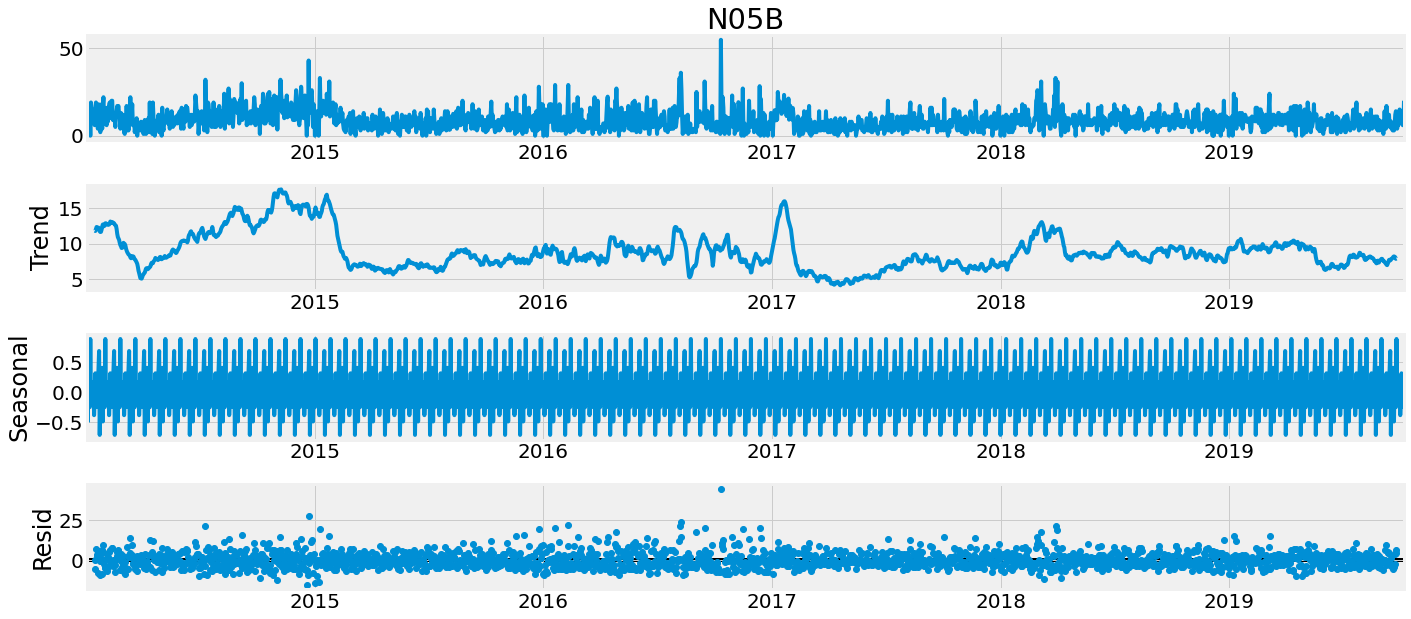

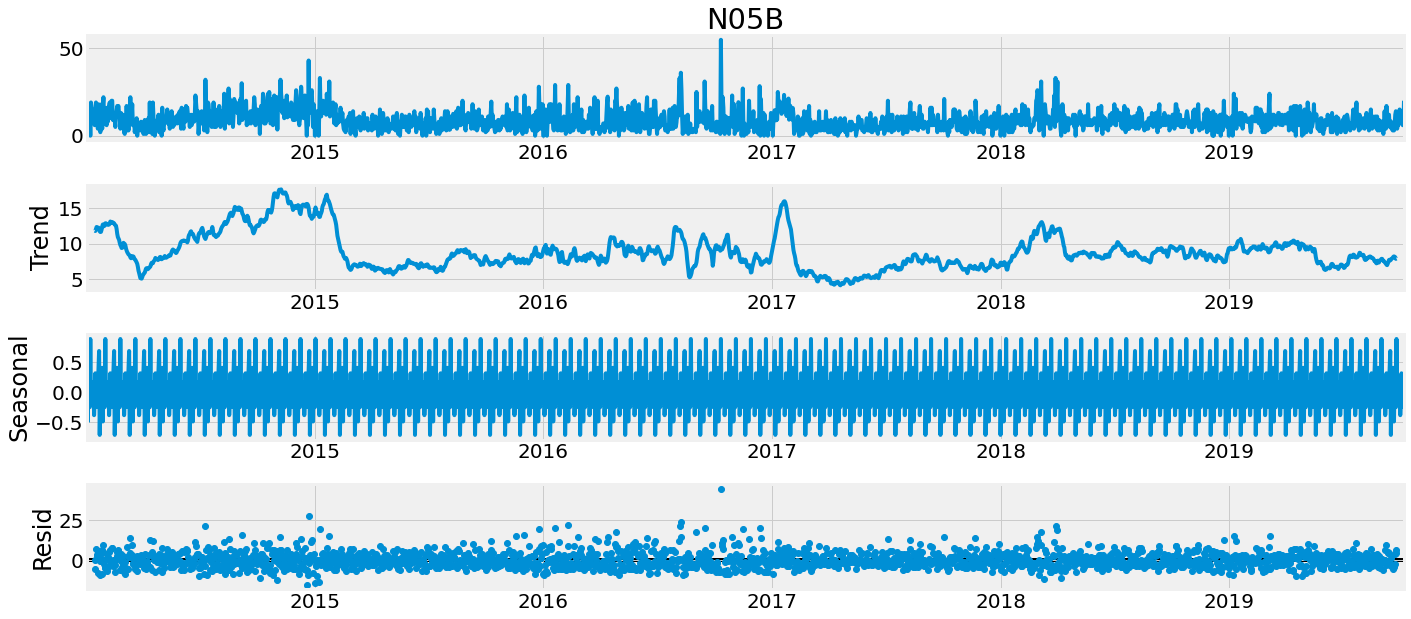

In [8]:
#seasonal decompose

rcParams['figure.figsize'] = 20, 9
plt.rcParams['font.size'] = '20'
result = seasonal_decompose(df1['N05B'],model='additive',  period=24)
result.plot()

Text(0.5, 1.0, 'Log Histogram')

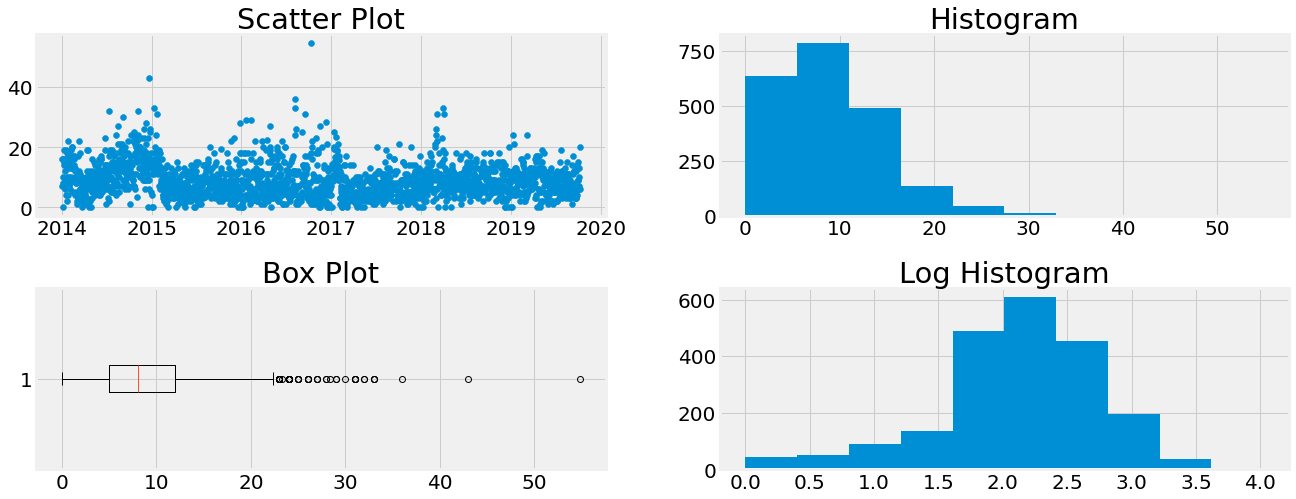

In [9]:
#data visualization

fig, ax = plt.subplots(2, 2, figsize=(20, 8))
fig.subplots_adjust(hspace=.4)

ax[0,0].scatter(y=df1["N05B"], x=df1["N05B"].index)
ax[0,0].set_title('Scatter Plot')
ax[0,1].hist(df1["N05B"])
ax[0,1].set_title('Histogram')
ax[1,0].boxplot(df1["N05B"], vert=False)
ax[1,0].set_title('Box Plot')
ax[1,1].hist(np.log(df1['N05B'] + 1))
ax[1,1].set_title('Log Histogram')

#### Logaritme

In [10]:
# evaluate series stationarity - unit root test

test1_adf = adfuller(np.log(df1["N05B"]+1), regression='c')
test1_kpss = kpss(np.log(df1["N05B"]+1), regression='c')
print("ADF p-value = {} | KPSS p-value = {}".format(test1_adf[1],test1_kpss[1]))

ADF p-value = 1.488373405171295e-09 | KPSS p-value = 0.01


C:\Users\joana\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\joana\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [11]:
#Since the tests are not consistent, the first difference will be performed

diff_N05B = df1["N05B"].diff().dropna()
diff_log_N05B=np.log(df1["N05B"]+1).diff().dropna()

In [12]:
# train - test split

split_index = int(len(diff_N05B)*0.8)
train_N05B = diff_N05B.iloc[:split_index]
test_N05B = diff_N05B.iloc[split_index:]
print('Train: {} | Test: {}'.format(train_N05B.shape[0], test_N05B.shape[0]))


train_log_N05B = diff_log_N05B.iloc[:split_index]
test_log_N05B = diff_log_N05B.iloc[split_index:]
print('Train_log: {} | Test_log: {}'.format(train_log_N05B.shape[0], test_log_N05B.shape[0]))

Train: 1684 | Test: 421
Train_log: 1684 | Test_log: 421


## N05C

In [13]:
# evaluate series stationarity - unit root test

test2_adf = adfuller(df1['N05C'], regression='c')
test2_kpss = kpss(df1['N05C'], regression='c')
print("ADF p-value = {} | KPSS p-value = {}".format(test2_adf[1],test2_kpss[1]))

C:\Users\joana\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


ADF p-value = 7.026617000697885e-28 | KPSS p-value = 0.1


C:\Users\joana\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


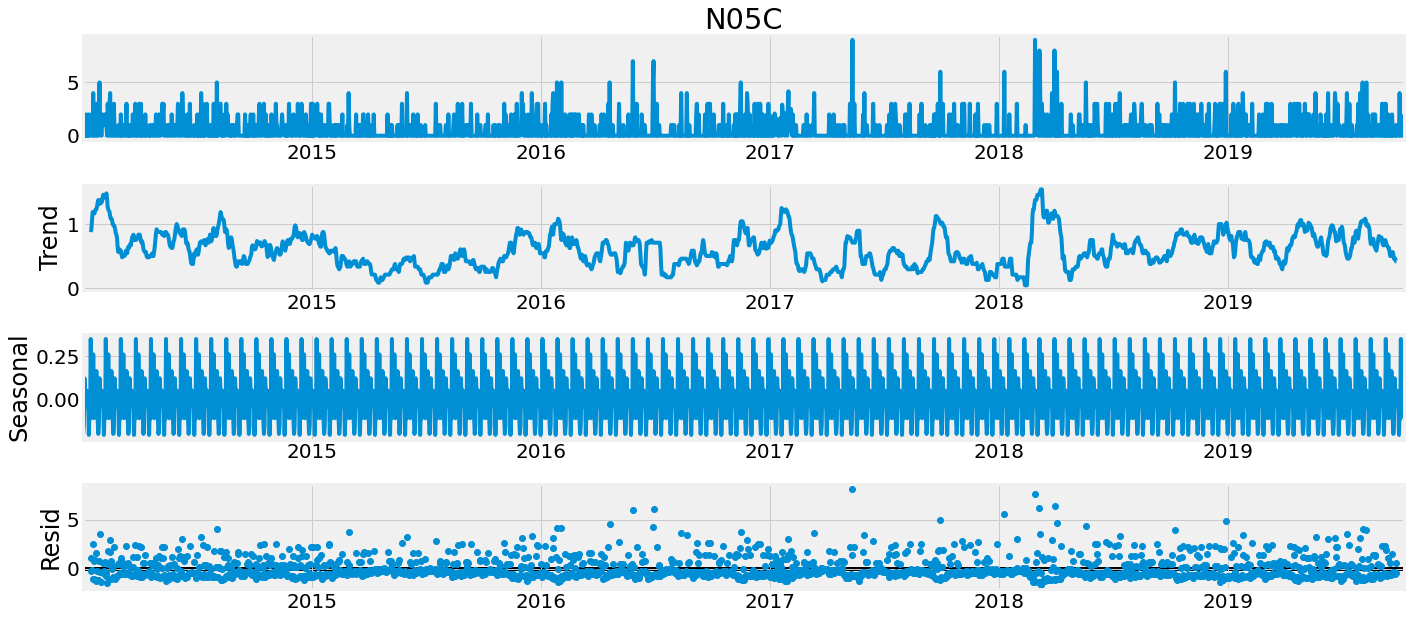

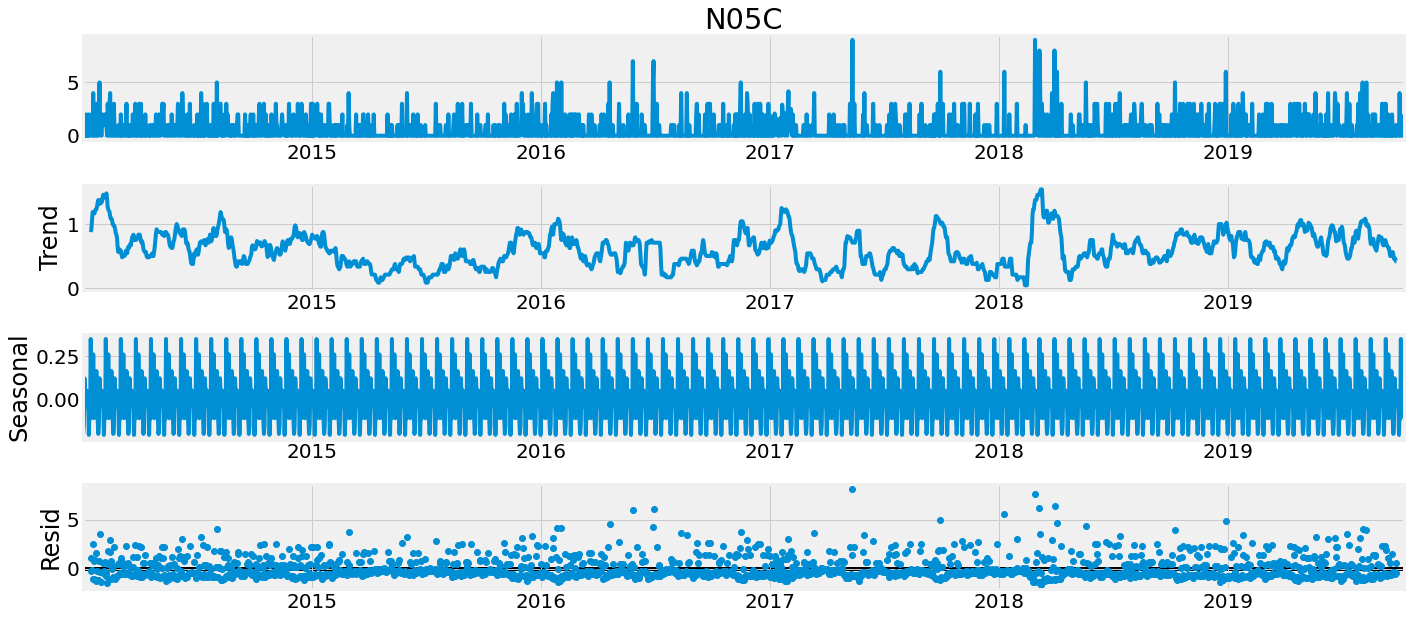

In [14]:
#seasonal decompose

rcParams['figure.figsize'] = 20, 9
plt.rcParams['font.size'] = '20'
result = seasonal_decompose(df1['N05C'],model='additive',  period=24)
result.plot()

Text(0.5, 1.0, 'Log Histogram')

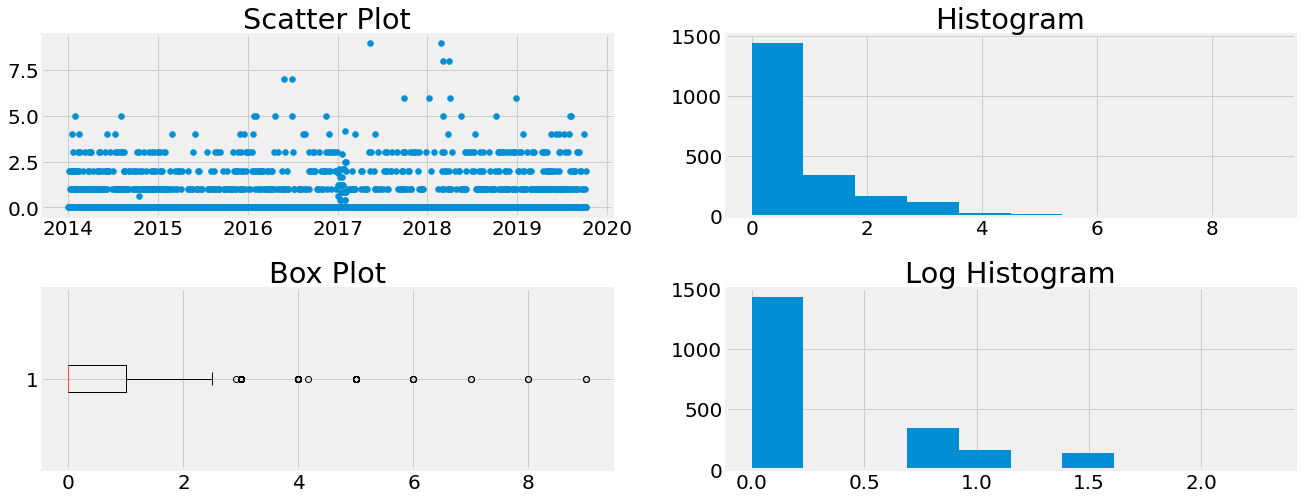

In [15]:
#data visualization

fig, ax = plt.subplots(2, 2, figsize=(20, 8))
fig.subplots_adjust(hspace=.4)

ax[0,0].scatter(y=df1["N05C"], x=df1["N05C"].index)
ax[0,0].set_title('Scatter Plot')
ax[0,1].hist(df1["N05C"])
ax[0,1].set_title('Histogram')
ax[1,0].boxplot(df1["N05C"], vert=False)
ax[1,0].set_title('Box Plot')
ax[1,1].hist(np.log(df1['N05C'] + 1))
ax[1,1].set_title('Log Histogram')

In [16]:
#As we can see in the previous image, logarithmizing does not improve the distribution of the series

In [17]:
df_N05C = df1["N05C"]

In [18]:
# train - test split

split_index = int(len(df_N05C)*0.8)
train_N05C = df_N05C.iloc[:split_index]
test_N05C = df_N05C.iloc[split_index:]
print('Train: {} | Test: {}'.format(train_N05C.shape[0], test_N05C.shape[0]))

Train: 1684 | Test: 422


## Auto Arima

### N05B

[]

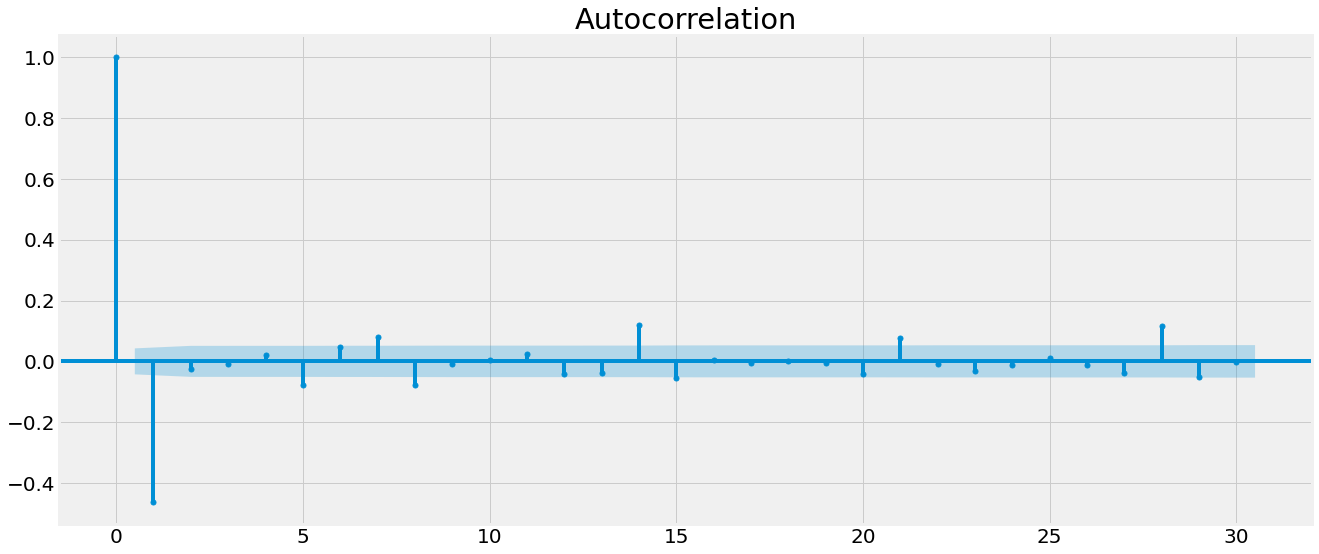

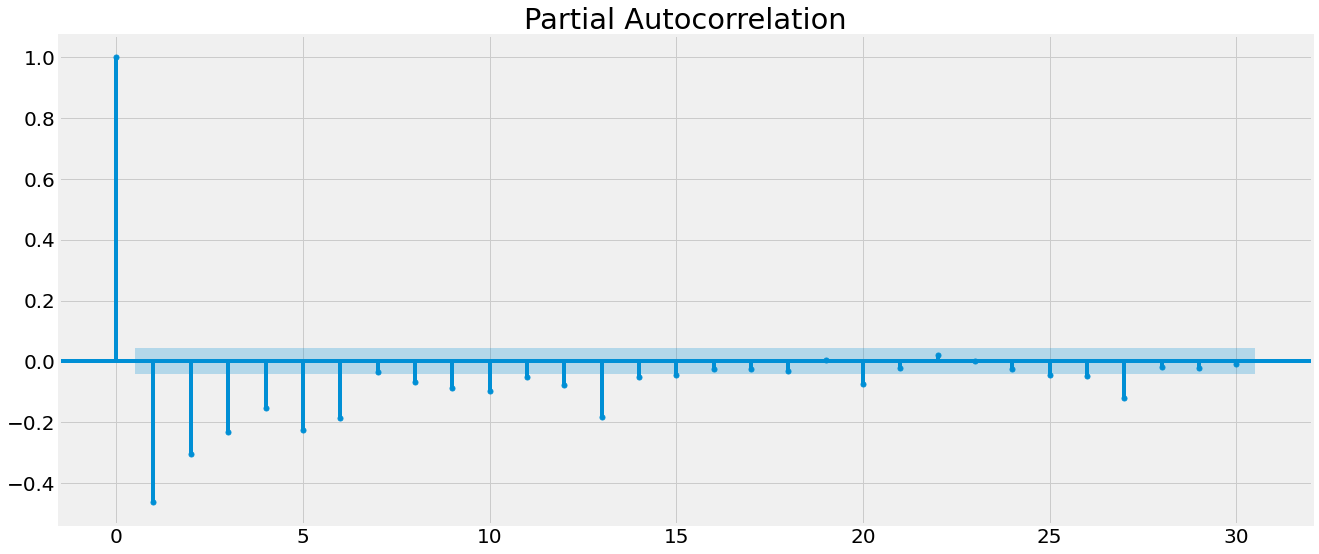

In [19]:
# correlogram

plot_acf(diff_log_N05B, lags=30, alpha=0.05)
plot_pacf(diff_log_N05B, lags=30, alpha=0.05)
plt.plot()

In [ ]:
#Auto arima

import pmdarima as pm 
stepwise_fit = pm.auto_arima(train_log_N05B, start_p=0, start_q=1,max_p=8, max_q=2,m=24, d=1, D=0,
start_P=0, seasonal=True, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=inf, Time=20.44 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=5877.078, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=4964.127, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=5875.078, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=4962.449, Time=0.19 sec
 ARIMA(1,1,0)(0,0,1)[24] intercept   : AIC=4964.086, Time=2.10 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=9.11 sec
 ARIMA(2,1,0)(0,0,0)[24] intercept   : AIC=4533.708, Time=0.32 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=4533.562, Time=2.97 sec
 ARIMA(2,1,0)(2,0,0)[24] intercept   : AIC=4533.866, Time=12.55 sec
 ARIMA(2,1,0)(1,0,1)[24] intercept   : AIC=4525.374, Time=11.91 sec
 ARIMA(2,1,0)(0,0,1)[24] intercept   : AIC=4533.400, Time=2.85 sec
 ARIMA(2,1,0)(2,0,1)[24] intercept   : AIC=4525.646, Time=33.93 sec
 ARIMA(2,1,0)(1,0,2)[24] intercept   : AIC=4525.952, Time=36.96 sec
 ARIMA(2,1,0)(0,0,2)[24]

In [ ]:
# best fitted model output

stepwise_fit.summary()

In [ ]:
# residuals analysis - overall

stepwise_fit.plot_diagnostics()
plt.show()

In [ ]:
# forecast

N05B_arima = stepwise_fit.predict(n_periods=len(test_log_N05B.index))

# join the forecasted value and the gdp_test values in the same dataframe and plot both

N05B_arima = pd.DataFrame(N05B_arima,index = test_log_N05B.index,columns=['Prediction'])
pd.concat([test_log_N05B,N05B_arima],axis=1).plot()
plt.show()

In [ ]:
results_arima = np.exp((pd.concat([test_log_N05B,N05B_arima],axis=1).cumsum())-1)
results_arima.tail(15)

In [ ]:
#model evaluation

MSE_arima = mean_squared_error(results_arima['N05B'], results_arima['Prediction'], squared=False)
MAE_arima = mean_absolute_error(results_arima['N05B'], results_arima['Prediction'])

results_arima_non_null = results_arima[results_arima['N05B'] != 0]
MAPE_arima = np.abs(np.mean((results_arima_non_null['Prediction'] - results_arima_non_null['N05B']) / results_arima_non_null['N05B'])) # MAPE for non-null values

print('ARIMA - N05B')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_arima, MAE_arima, MAPE_arima))

## Sarimax

In [16]:
import warnings
import itertools
import statsmodels.api as sm

In [17]:
# Define the parameters d and q to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 5 and 7
p = range(5, 8)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(range(0,3), range(0,2), range(0,3)))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (5, 0, 1) x (0, 0, 1, 24)
SARIMAX: (5, 0, 1) x (0, 0, 2, 24)
SARIMAX: (5, 1, 0) x (0, 1, 0, 24)
SARIMAX: (5, 1, 0) x (0, 1, 1, 24)


In [18]:
# auto-sarimax loop

warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_log_N05B,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [19]:
# print best model
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 3041.3714700381142 for model SARIMAX(7, 0, 1)x(2, 0, 0, 24)


In [20]:
# Let's fit this model
mods = sm.tsa.statespace.SARIMAX(train_log_N05B,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultss = mods.fit()

In [67]:
# Let's fit this model
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(train_log_N05B,order=(7,0,1),seasonal_order=(2,0,0,24), enforce_stationarity=False, enforce_invertibility=False)

results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                N05B   No. Observations:                 1684
Model:             SARIMAX(7, 0, 1)x(2, 0, [], 24)   Log Likelihood               -1509.686
Date:                             Wed, 16 Jun 2021   AIC                           3041.371
Time:                                     22:00:11   BIC                           3100.724
Sample:                                 01-03-2014   HQIC                          3063.391
                                      - 08-13-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1126      0.025      4.456      0.000       0.063       0.162
ar.L2          0.0302      0.026      1.151      0.250      -0.021       0.082
ar.L3          0.0095      0.025      0.380      0.704      -0.039       0.058
ar.L4          0.0278      0.025      1.118      0.264      -0.021       0.077
ar.L5         -0.0572      0.026     -2.164      0.030      -0.109      -0.005
ar.L6          0.0679      0.022      3.063      0.002       0.024       0.111
ar.L7          0.0734      0.024      3.033      0.002       0.026       0.121
ma.L1         -0.9654      0.010   -100.943      0.000      -0.984      -0.947
ar.S.L24      -0.0745      0.027     -2.766      0.006      -0.127      -0.022
ar.S.L48      -0.0343      0.024     -1.422      0.155      -0.082       0.013
sigma2         0.3731      0.010     37.900      0.000       0.354       0.392
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               400.64
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.84
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
print(sm.stats.diagnostic.acorr_ljungbox(results.resid, lags=[1], return_df=True))

    lb_stat  lb_pvalue
1  1.894887   0.168652


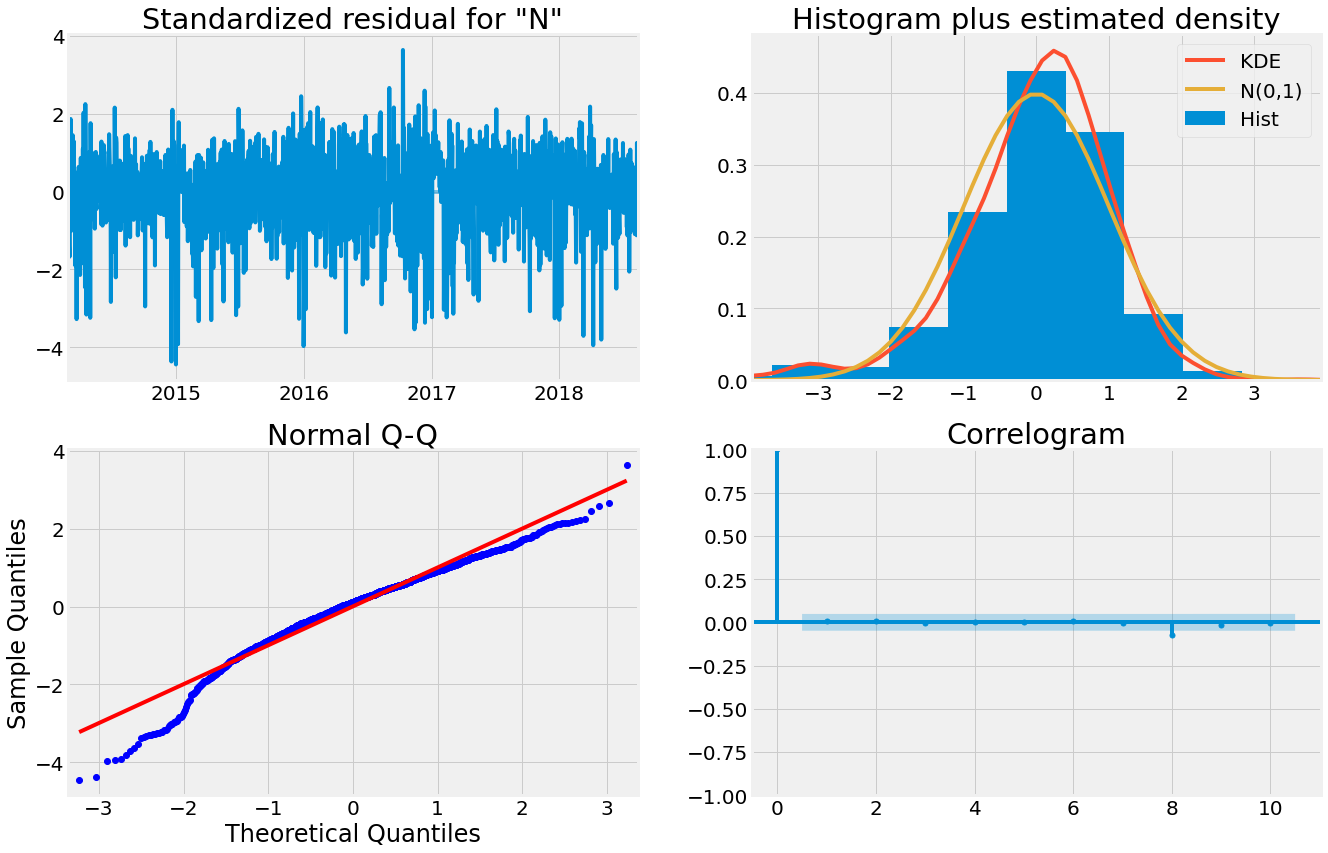

In [22]:
# visual check for residuals
resultss.plot_diagnostics(figsize=(20, 14))
plt.show()

In [25]:
# forecast

pred_sarima = resultss.get_forecast('2019-10-08')
pred_sarima_ci = resultss.conf_int()
print(pred_sarima.predicted_mean)

2018-08-14   -5.161442e-01
2018-08-15    1.202716e-01
2018-08-16   -2.279040e-01
2018-08-17    1.449401e-01
2018-08-18   -4.049755e-02
                  ...     
2019-10-04   -1.297165e-14
2019-10-05    5.176037e-15
2019-10-06   -2.530000e-14
2019-10-07    2.765693e-14
2019-10-08    8.601421e-15
Freq: D, Name: predicted_mean, Length: 421, dtype: float64


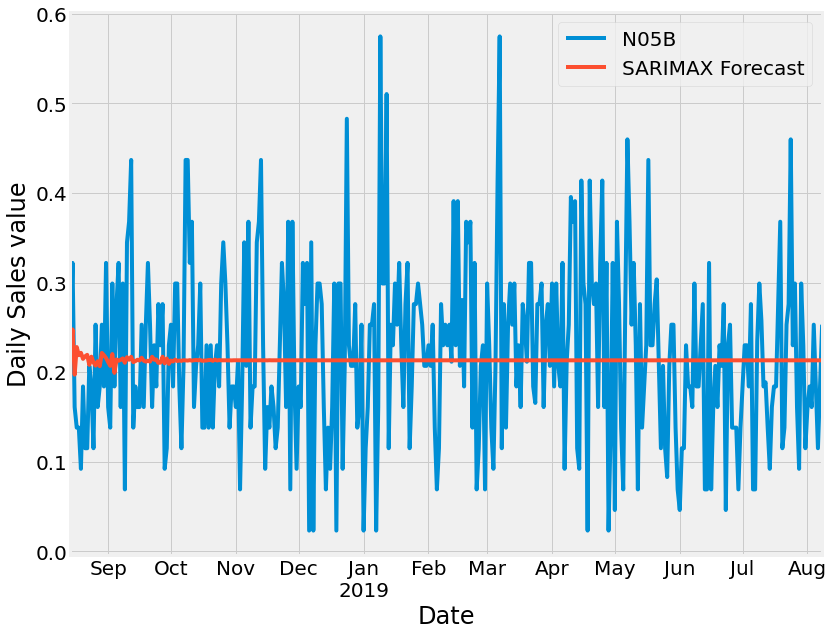

In [31]:
# plot all predictions in the same picture

ax = np.exp((test_log_N05B.cumsum())-1)[:360].plot(figsize=(12, 10))
np.exp(((pred_sarima.predicted_mean).cumsum())-1)[:360].plot(ax=ax, label='SARIMAX Forecast')

plt.ylabel('Daily Sales value')
plt.xlabel('Date')
plt.legend()

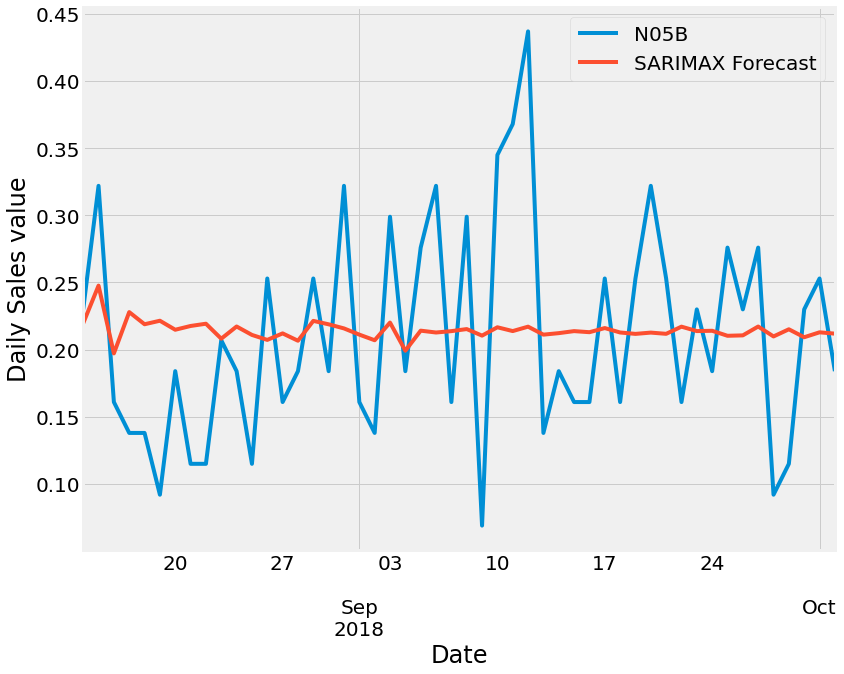

In [32]:
# plot all predictions in the same picture
ax = np.exp((test_log_N05B.cumsum())-1)[:50].plot(figsize=(12, 10))
np.exp(((pred_sarima.predicted_mean).cumsum())-1)[:50].plot(ax=ax, label='SARIMAX Forecast')
# ax.fill_between(pred_sarima_ci.index, pred_sarima_ci.iloc[:, 0], pred_sarima_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Daily Sales value')
plt.xlabel('Date')
plt.legend()

In [36]:
results_sarima = np.exp((pd.concat([test_log_N05B,pred_sarima.predicted_mean],axis=1).cumsum())-1)
results_sarima.rename(columns={0:'Prediction'}, inplace=True)
results_sarima.head()

,N05B,predicted_mean
2018-08-14,0.229925,0.219557
2018-08-15,0.321895,0.247617
2018-08-16,0.160947,0.197153
2018-08-17,0.137955,0.227903
2018-08-18,0.137955,0.218858


In [40]:
#Model evaluation

MSE_sarima = mean_squared_error(results_sarima['N05B'], results_sarima['predicted_mean'], squared=False)
MAE_sarima = mean_absolute_error(results_sarima['N05B'], results_sarima['predicted_mean'])

results_sarima_non_null = results_sarima[results_sarima['N05B'] != 0]
MAPE_sarima = np.abs(np.mean((results_sarima_non_null['predicted_mean'] - results_sarima_non_null['N05B']) / results_sarima_non_null['N05B'])) # MAPE for non-null values

print('SARIMA - N05B')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_sarima, MAE_sarima, MAPE_sarima))

SARIMA - N05B
MSE: 0.0963891795679547 
MAE: 0.07699123512987897 
MAPE: 0.32718600002566317


## N05C

[]

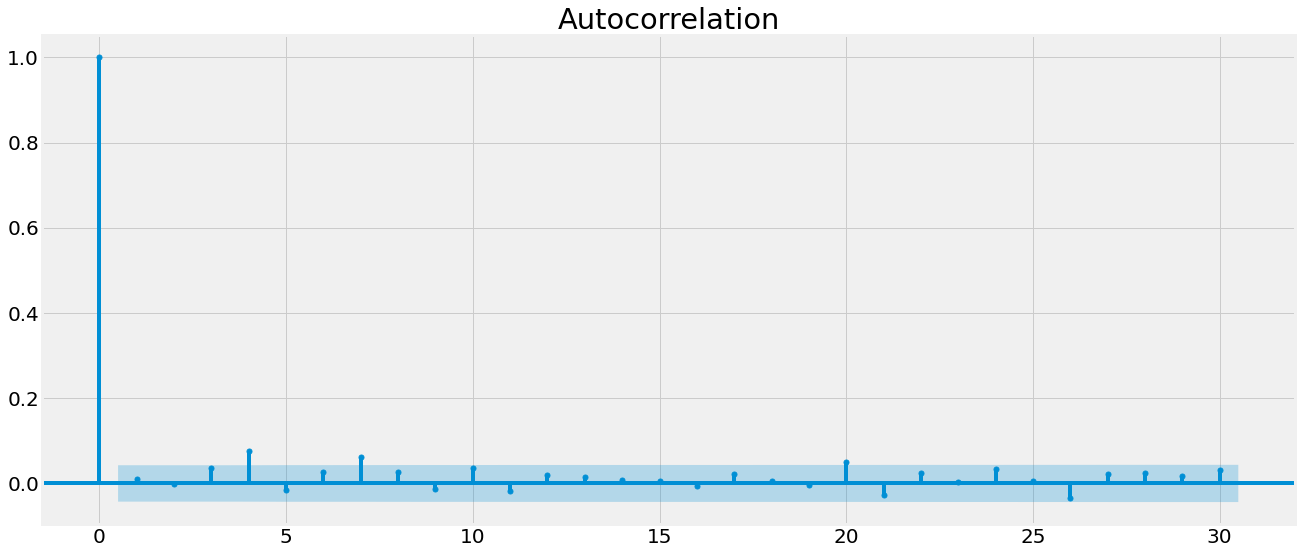

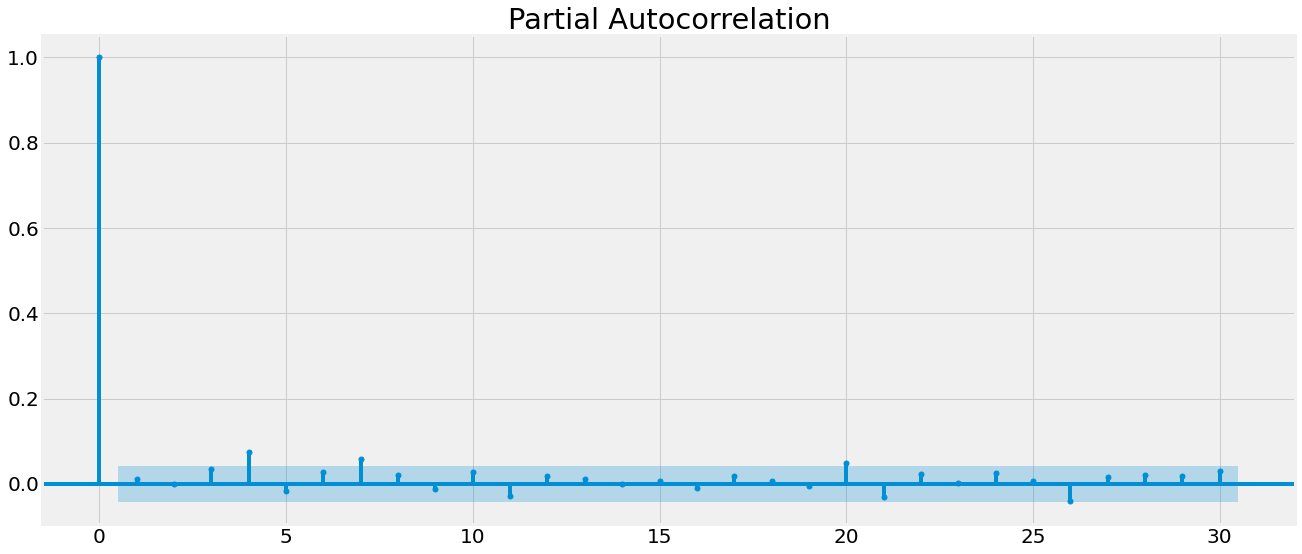

In [16]:
# correlogram

plot_acf(df_N05C, lags=30, alpha=0.05)
plot_pacf(df_N05C, lags=30, alpha=0.05)
plt.plot()

In [17]:
#Auto Arima

stepwise_fit = pm.auto_arima(train_N05C, start_p=0, start_q=0,max_p=5, max_q=5,m=12, d=1, D=0,
start_P=0, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True) 

C:\Users\joana\anaconda\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6175.594, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5719.291, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5067.440, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6173.594, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5068.749, Time=0.99 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5068.745, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5071.416, Time=1.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5065.712, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5067.044, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5067.039, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5717.291, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=1.44 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.551 seconds


In [19]:
# best fitted model output

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2530.856
Date:                Sat, 19 Jun 2021   AIC                           5065.712
Time:                        18:41:17   BIC                           5076.568
Sample:                             0   HQIC                          5069.733
                               - 1684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9878      0.004   -265.198      0.000      -0.995      -0.981
sigma2         1.1823      0.016     73.088      0.000       1.151       1.214
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):             10547.85
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             2.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

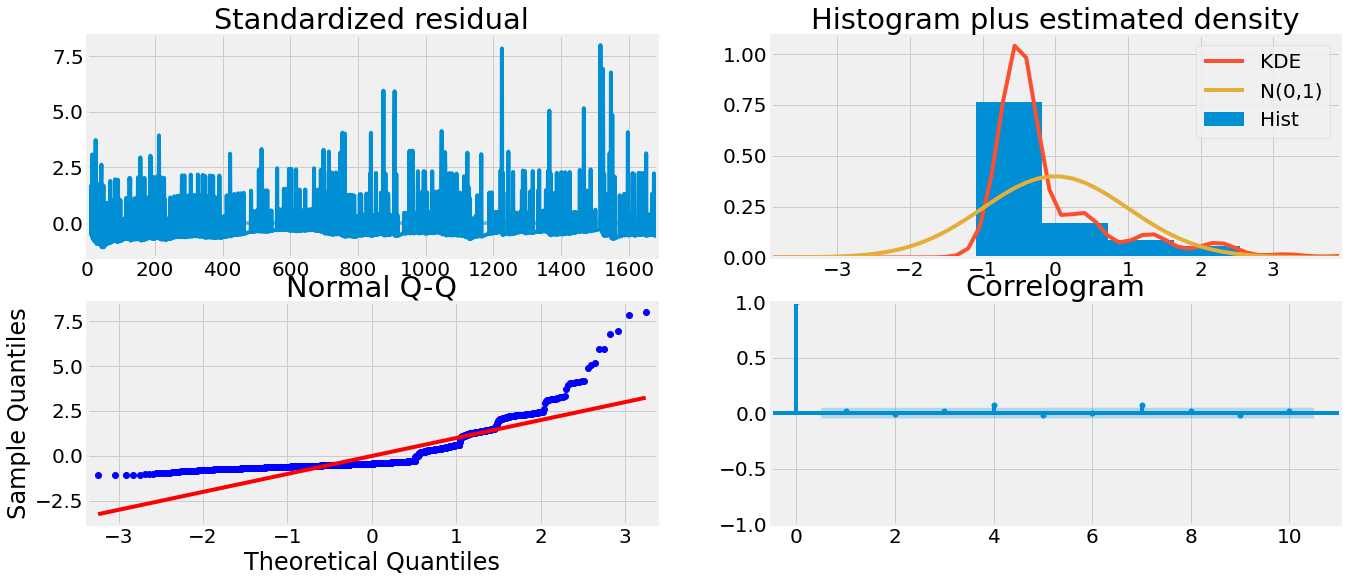

In [20]:
# residuals analysis - overall

stepwise_fit.plot_diagnostics()
plt.show()

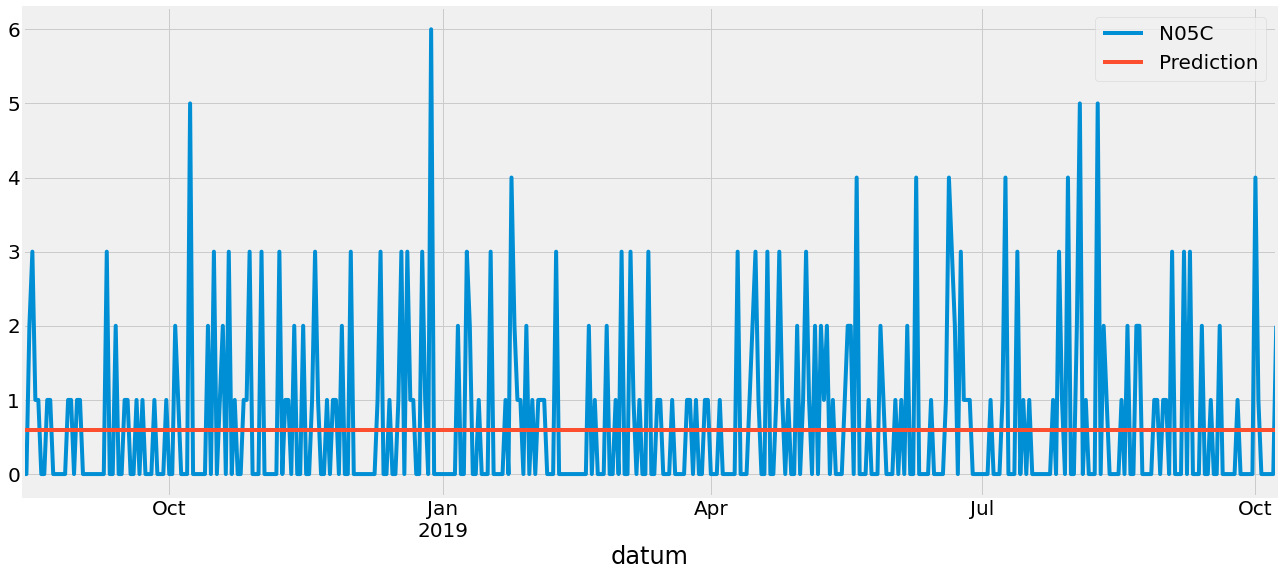

In [21]:
# forecast

N05C_arima = stepwise_fit.predict(n_periods=len(test_N05C.index))

# join the forecasted value and the gdp_test values in the same dataframe and plot both

N05C_arima = pd.DataFrame(N05C_arima,index = test_N05C.index,columns=['Prediction'])
pd.concat([test_N05C,N05C_arima],axis=1).plot()
plt.show()

In [22]:
#preditions

results_arima = pd.concat([test_N05C,N05C_arima],axis=1)
results_arima.tail(15)

,N05C,Prediction
datum,,
2019-09-24,0.0,0.591695
2019-09-25,1.0,0.591695
2019-09-26,0.0,0.591695
2019-09-27,0.0,0.591695
2019-09-28,0.0,0.591695
2019-09-29,0.0,0.591695
2019-09-30,0.0,0.591695
2019-10-01,4.0,0.591695
2019-10-02,1.0,0.591695


In [23]:
#Model evaluation

MSE_arima = mean_squared_error(results_arima['N05C'], results_arima['Prediction'], squared=False)
MAE_arima = mean_absolute_error(results_arima['N05C'], results_arima['Prediction'])

results_arima_non_null = results_arima[results_arima['N05C'] != 0]
MAPE_arima = np.abs(np.mean((results_arima_non_null['Prediction'] - results_arima_non_null['N05C']) / results_arima_non_null['N05C'])) # MAPE for non-null values

print('ARIMA - N05C')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_arima, MAE_arima, MAPE_arima))

ARIMA - N05C
MSE: 1.1077353941613344 
MAE: 0.8340903178820727 
MAPE: 0.5732125574459872


## Sarimax

In [46]:
# Define the parameters d and q to take any value between 0 and 2
q = d = range(0, 3)
# Define the p parameters to take any value between 0 and 2
p = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,3), range(0,3), range(0,3)))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [47]:
# auto-sarimax loop

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_N05C,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [48]:
# print best model

print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 4979.432197900568 for model SARIMAX(0, 1, 2)x(0, 0, 2, 12)


In [49]:
# Let's fit this model

mods = sm.tsa.statespace.SARIMAX(train_N05C,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultss = mods.fit()

In [34]:
# Let's fit this model

from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(train_N05C ,order=(0,1,2),seasonal_order=(0,0,2,12), enforce_stationarity=False, enforce_invertibility=False)

results = mod.fit()
results.summary()

C:\Users\joana\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\joana\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               N05C   No. Observations:                 1684
Model:             SARIMAX(0, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -2484.716
Date:                            Sat, 19 Jun 2021   AIC                           4979.432
Time:                                    18:45:05   BIC                           5006.493
Sample:                                01-02-2014   HQIC                          4989.463
                                     - 08-12-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9846      0.021    -47.389      0.000      -1.025      -0.944
ma.L2         -0.0263      0.020     -1.323      0.186      -0.065       0.013
ma.S.L12      -0.0074      0.028     -0.267      0.790      -0.062       0.047
ma.S.L24       0.0319      0.019      1.671      0.095      -0.006       0.069
sigma2         1.1502      0.017     66.315      0.000       1.116       1.184
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10579.12
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             2.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Several models were tested, but the assumption of non-heteroscedasticity was not verified 

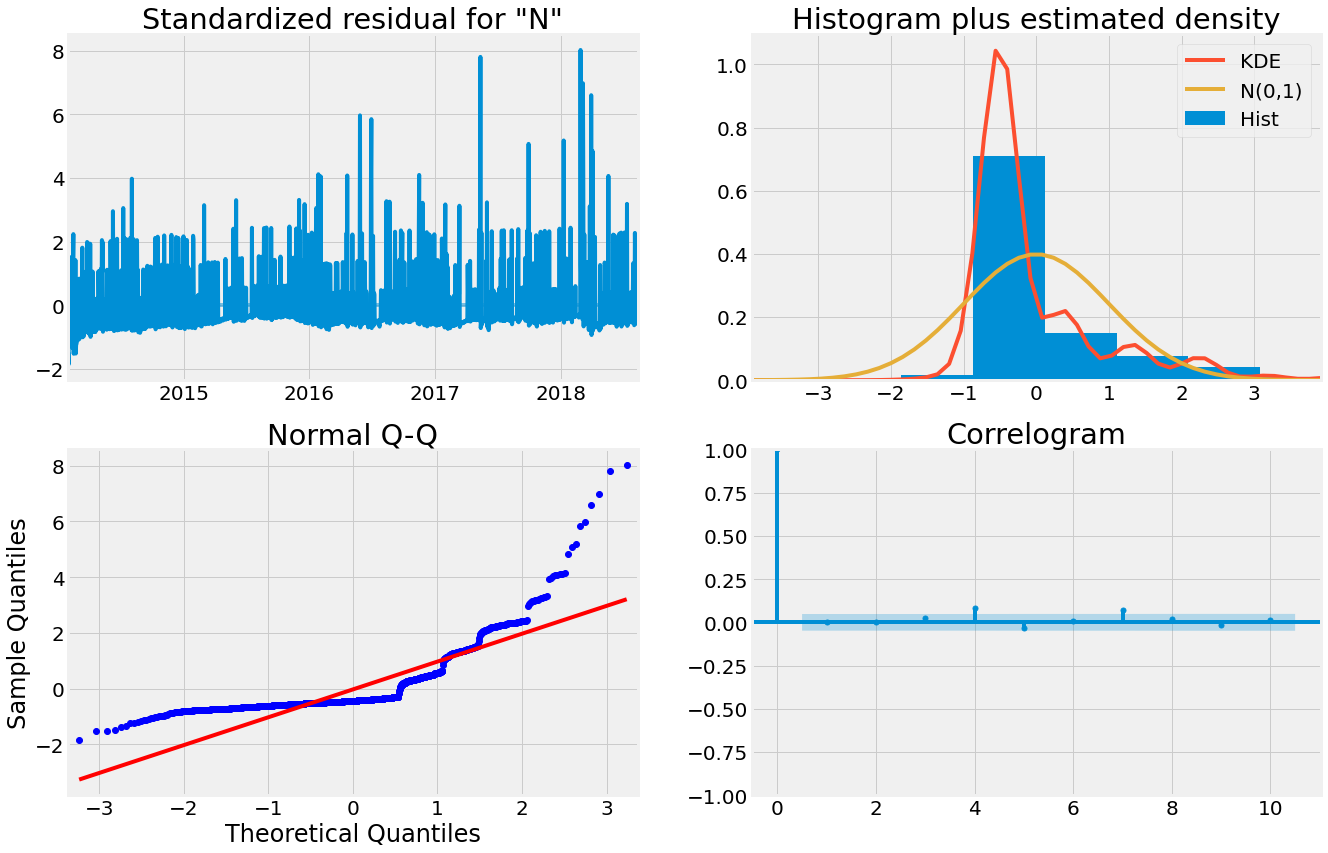

In [35]:
# visual check for residuals

results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [37]:
# out-of-sample forecast

pred_sarima = results.get_forecast('2019-10-08')
pred_sarima_ci = results.conf_int()
print(pred_sarima.predicted_mean)

2018-08-13    0.583286
2018-08-14    0.576250
2018-08-15    0.575743
2018-08-16    0.584399
2018-08-17    0.591748
                ...   
2019-10-04    0.588868
2019-10-05    0.588868
2019-10-06    0.588868
2019-10-07    0.588868
2019-10-08    0.588868
Freq: D, Name: predicted_mean, Length: 422, dtype: float64


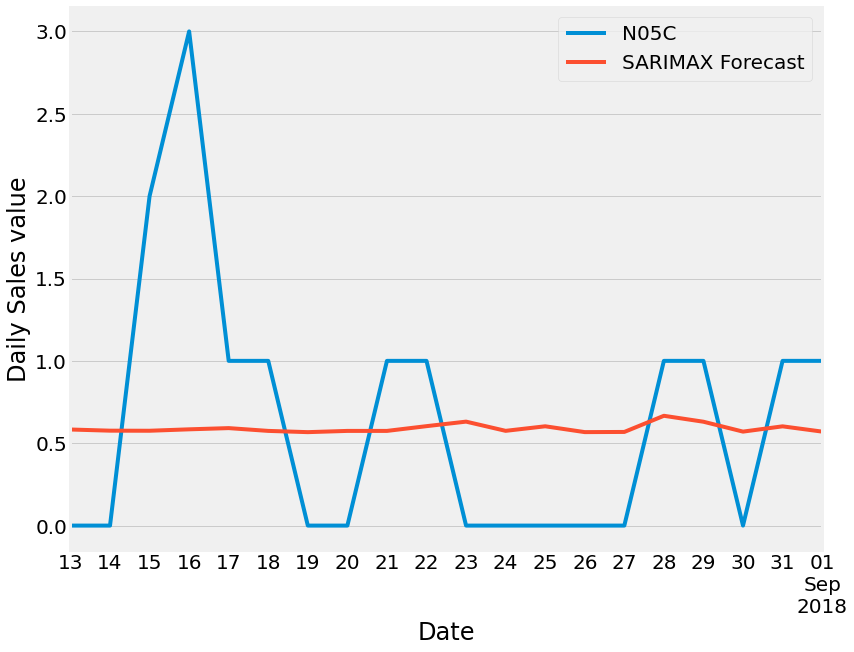

In [38]:
# plot all predictions in the same picture

ax = test_N05C[:20].plot(figsize=(12, 10))
pred_sarima.predicted_mean[:20].plot(ax=ax, label='SARIMAX Forecast')

plt.ylabel('Daily Sales value')
plt.xlabel('Date')
plt.legend()

In [39]:
#preditions

results_sarima = pd.concat([test_N05C,pred_sarima.predicted_mean],axis=1)
results_sarima.rename(columns={0:'Prediction'}, inplace=True)
results_sarima.head(15)

,N05C,predicted_mean
2018-08-13,0.0,0.583286
2018-08-14,0.0,0.576250
2018-08-15,2.0,0.575743
2018-08-16,3.0,0.584399
2018-08-17,1.0,0.591748
2018-08-18,1.0,0.574824
2018-08-19,0.0,0.567280
2018-08-20,0.0,0.574793
2018-08-21,1.0,0.574793
2018-08-22,1.0,0.603627


In [42]:
#model evaluation

MSE_sarima = mean_squared_error(results_sarima['N05C'], results_sarima['predicted_mean'], squared=False)
MAE_sarima = mean_absolute_error(results_sarima['N05C'], results_sarima['predicted_mean'])

results_sarima_non_null = results_sarima[results_sarima['N05C'] != 0]
MAPE_sarima = np.abs(np.mean((results_sarima_non_null['predicted_mean'] - results_sarima_non_null['N05C']) / results_sarima_non_null['N05C'])) # MAPE for non-null values

print('SARIMA - N05C')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_sarima, MAE_sarima, MAPE_sarima))

SARIMA - N05C
MSE: 1.1078502764207077 
MAE: 0.8329590086161007 
MAPE: 0.5746585236551074
